# Vader 

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

In [2]:
#pd.set_option('display.max_columns')
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
#additional_stop_words = {'year', 'state', 'also', 'just', 'really', 'still', 'would'} 
#stop_words.update(additional_stop_words)
lemmatizer = WordNetLemmatizer()

# Define a function for preprocessing
def preprocess_text(text):
    # Check if text is NaN
    if pd.isna(text):
        return ''
    
    # Remove numbers, months, and years
    text = re.sub(r'\d+', '', text)  # Remove numbers
    #text = re.sub(r'(January|February|March|April|May|June|July|August|September|October|November|December)', '', text, flags=re.IGNORECASE)  # Remove months
    text = re.sub(r'(19\d{2}|20\d{2})', '', text)  # Remove years

    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize and remove stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    # Join the tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [4]:
!pip install vadersentiment

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
import pandas as pd 
df = pd.read_csv('Final Monster\'s reviews-2.csv')
# Apply preprocessing to the 'Delay Description' column
df['title']=df['title'].apply(preprocess_text)
df['reviews'] = df['reviews'].apply(preprocess_text)
analyzer = SentimentIntensityAnalyzer()

#parsing the data(the dataframe from before) into the analyzer
scores = [analyzer.polarity_scores(sentence) for sentence in df]

In [8]:
df['title']=df['title'].str.lower()
df['reviews']=df['reviews'].str.lower()


In [9]:
# Convert 'title' and 'reviews' to string, replace NaN with empty strings
df['title'] = df['title'].fillna('').astype(str)
df['reviews'] = df['reviews'].fillna('').astype(str)

# Combine 'title' and 'reviews' into one column and convert to lowercase
df['combined'] = df['title'].str.cat(df['reviews'], sep=' ').str.lower()


In [10]:
df['rating']= df['rating'].apply(lambda x: float(x.split()[0]))
df['rating']

0      5.0
1      1.0
2      5.0
3      5.0
4      5.0
      ... 
495    5.0
496    5.0
497    5.0
498    1.0
499    5.0
Name: rating, Length: 500, dtype: float64

In [11]:
df

,Unnamed: 0,product,date,rating,reviews,title,combined
0,0,Amazon.com: Customer reviews: Monster Energy Z...,"April 21, 2024",5.0,great taste,,great taste
1,1,Amazon.com: Customer reviews: Monster Energy Z...,"April 20, 2024",1.0,box damp one can busted,,box damp one can busted
2,2,Amazon.com: Customer reviews: Monster Energy Z...,"April 20, 2024",5.0,using stevia year use everything absolutely be...,,using stevia year use everything absolutely b...
3,3,Amazon.com: Customer reviews: Monster Energy Z...,"April 19, 2024",5.0,love much,,love much
4,4,Amazon.com: Customer reviews: Monster Energy Z...,"April 19, 2024",5.0,every thing package nothing damaged metal can ...,,every thing package nothing damaged metal can...
...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Monster Energy J...,"February 1, 2024",5.0,excellent price several flavor favorite energy...,great flavors,great flavors excellent price several flavor f...
496,496,Amazon.com: Customer reviews: Monster Energy J...,"January 30, 2024",5.0,decent variety flavor would recommend like swi...,good variety,good variety decent variety flavor would recom...
497,497,Amazon.com: Customer reviews: Monster Energy J...,"January 29, 2024",5.0,hard find store around area order line,si good,si good hard find store around area order line
498,498,Amazon.com: Customer reviews: Monster Energy J...,"January 28, 2024",1.0,product tasted like grease taste old drink tim...,disappointed,disappointed product tasted like grease taste ...


In [12]:
#df = df.drop(columns=['rating_number'])
def encode_sentiment(rating):
    if rating >= 4.0:
        return 1
    else:
        return 0

df['sentiment']=df['rating'].apply(encode_sentiment)
df
    

,Unnamed: 0,product,date,rating,reviews,title,combined,sentiment
0,0,Amazon.com: Customer reviews: Monster Energy Z...,"April 21, 2024",5.0,great taste,,great taste,1
1,1,Amazon.com: Customer reviews: Monster Energy Z...,"April 20, 2024",1.0,box damp one can busted,,box damp one can busted,0
2,2,Amazon.com: Customer reviews: Monster Energy Z...,"April 20, 2024",5.0,using stevia year use everything absolutely be...,,using stevia year use everything absolutely b...,1
3,3,Amazon.com: Customer reviews: Monster Energy Z...,"April 19, 2024",5.0,love much,,love much,1
4,4,Amazon.com: Customer reviews: Monster Energy Z...,"April 19, 2024",5.0,every thing package nothing damaged metal can ...,,every thing package nothing damaged metal can...,1
...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Monster Energy J...,"February 1, 2024",5.0,excellent price several flavor favorite energy...,great flavors,great flavors excellent price several flavor f...,1
496,496,Amazon.com: Customer reviews: Monster Energy J...,"January 30, 2024",5.0,decent variety flavor would recommend like swi...,good variety,good variety decent variety flavor would recom...,1
497,497,Amazon.com: Customer reviews: Monster Energy J...,"January 29, 2024",5.0,hard find store around area order line,si good,si good hard find store around area order line,1
498,498,Amazon.com: Customer reviews: Monster Energy J...,"January 28, 2024",1.0,product tasted like grease taste old drink tim...,disappointed,disappointed product tasted like grease taste ...,0


In [13]:
neg_s = [i["neg"] for i in scores]
neu_s = [i["neu"] for i in scores]
pos_s = [i["pos"] for i in scores]
compound_s = [i["compound"] for i in scores]

In [14]:
# Ensure Sentences column contains strings, not lists
#df['reviews'] = df['reviews'].str.join(' ') 

df['vader_scores'] = df['combined'].apply(lambda x: analyzer.polarity_scores(x))

df['negscore_Vader'] = df['vader_scores'].apply(lambda x: x['neg'])
df['neuscore_Vader'] = df['vader_scores'].apply(lambda x: x['neu'])
df['posscore_Vader'] = df['vader_scores'].apply(lambda x: x['pos'])
df['compound_Vader'] = df['vader_scores'].apply(lambda x: x['compound'])

# Define a function that classifies sentiments based on the compound score
def classify_vader_sentiment(row, threshold=0.05):
    if row['compound_Vader'] >= threshold:
        return 1  # Positive sentiment
    else: 
        return 0  # Negative sentiment
    
#df.drop('vader_scores', axis=1, inplace=True)

#vader_textblob_df = df[['product', 'rating', 'title', 'reviews', 'combined', 'polarity', 'subjectivity','negscore_Vader', 'neuscore_Vader', 'posscore_Vader', 'compound_Vader']]
# Apply the classification function to create a new column for Vader sentiment
df['Vader_Sentiment'] = df.apply(classify_vader_sentiment, axis=1)
df



,Unnamed: 0,product,date,rating,reviews,title,combined,sentiment,vader_scores,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader,Vader_Sentiment
0,0,Amazon.com: Customer reviews: Monster Energy Z...,"April 21, 2024",5.0,great taste,,great taste,1,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.000,0.196,0.804,0.6249,1
1,1,Amazon.com: Customer reviews: Monster Energy Z...,"April 20, 2024",1.0,box damp one can busted,,box damp one can busted,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0
2,2,Amazon.com: Customer reviews: Monster Energy Z...,"April 20, 2024",5.0,using stevia year use everything absolutely be...,,using stevia year use everything absolutely b...,1,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",0.000,0.523,0.477,0.9646,1
3,3,Amazon.com: Customer reviews: Monster Energy Z...,"April 19, 2024",5.0,love much,,love much,1,"{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...",0.000,0.192,0.808,0.6369,1
4,4,Amazon.com: Customer reviews: Monster Energy Z...,"April 19, 2024",5.0,every thing package nothing damaged metal can ...,,every thing package nothing damaged metal can...,1,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'comp...",0.000,0.853,0.147,0.3412,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Monster Energy J...,"February 1, 2024",5.0,excellent price several flavor favorite energy...,great flavors,great flavors excellent price several flavor f...,1,"{'neg': 0.0, 'neu': 0.317, 'pos': 0.683, 'comp...",0.000,0.317,0.683,0.9169,1
496,496,Amazon.com: Customer reviews: Monster Energy J...,"January 30, 2024",5.0,decent variety flavor would recommend like swi...,good variety,good variety decent variety flavor would recom...,1,"{'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compou...",0.000,0.470,0.530,0.7845,1
497,497,Amazon.com: Customer reviews: Monster Energy J...,"January 29, 2024",5.0,hard find store around area order line,si good,si good hard find store around area order line,1,"{'neg': 0.124, 'neu': 0.619, 'pos': 0.257, 'co...",0.124,0.619,0.257,0.3612,1
498,498,Amazon.com: Customer reviews: Monster Energy J...,"January 28, 2024",1.0,product tasted like grease taste old drink tim...,disappointed,disappointed product tasted like grease taste ...,0,"{'neg': 0.395, 'neu': 0.446, 'pos': 0.159, 'co...",0.395,0.446,0.159,-0.5719,0


In [15]:
df['sentiment'].value_counts()


sentiment
1    317
0    183
Name: count, dtype: int64

In [16]:
# Create a column for positive compound scores
df['positive_compound'] = df['compound_Vader'].apply(lambda x: x if x > 0 else None)

# Create a column for negative compound scores
df['negative_compound'] = df['compound_Vader'].apply(lambda x: x if x <= 0 else None)

# Display the DataFrame to verify the new columns
df[['compound_Vader', 'positive_compound', 'negative_compound']]


,compound_Vader,positive_compound,negative_compound
0,0.6249,0.6249,NaN
1,0.0000,NaN,0.0000
2,0.9646,0.9646,NaN
3,0.6369,0.6369,NaN
4,0.3412,0.3412,NaN
...,...,...,...
495,0.9169,0.9169,NaN
496,0.7845,0.7845,NaN
497,0.3612,0.3612,NaN
498,-0.5719,NaN,-0.5719


In [17]:
df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.strftime('%B %Y')
df[['date', 'month_year']]


,date,month_year
0,2024-04-21,April 2024
1,2024-04-20,April 2024
2,2024-04-20,April 2024
3,2024-04-19,April 2024
4,2024-04-19,April 2024
...,...,...
495,2024-02-01,February 2024
496,2024-01-30,January 2024
497,2024-01-29,January 2024
498,2024-01-28,January 2024


In [18]:
df.to_csv('Monster_Vader2.csv')

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

report = classification_report(df['sentiment'], df['Vader_Sentiment'], target_names=['Negative', 'Positive'], output_dict=False)
print(report)

              precision    recall  f1-score   support

    Negative       0.77      0.60      0.67       183
    Positive       0.80      0.90      0.84       317

    accuracy                           0.79       500
   macro avg       0.78      0.75      0.76       500
weighted avg       0.79      0.79      0.78       500



In [20]:
precision, recall, f1, _ = precision_recall_fscore_support(df['sentiment'], df['Vader_Sentiment'], average='weighted')

accuracy = accuracy_score(df['sentiment'], df['Vader_Sentiment'])

print("\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")



Evaluation Metrics:
Precision: 0.79
Recall: 0.79
F1-Score: 0.78
Accuracy: 0.79


In [84]:
df.to_csv('Monster_vader.csv')

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


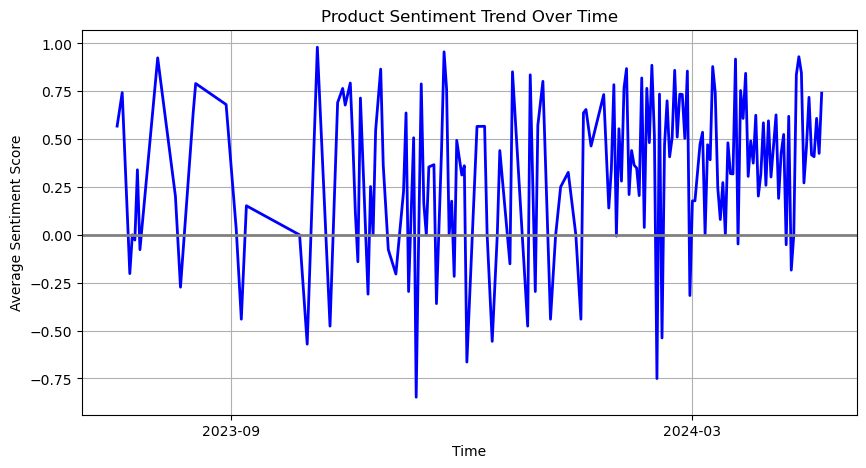

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Aggregate the sentiment scores by date. 
df_aggregated = df.groupby('date')['compound_Vader'].mean().reset_index()

# Plot the trend line
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['compound_Vader'], marker='', color='blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')


# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) 

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Product Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')

# Save with a transparent background
plt.savefig('red bull trend over year.png', transparent=True, bbox_inches='tight')

plt.show()


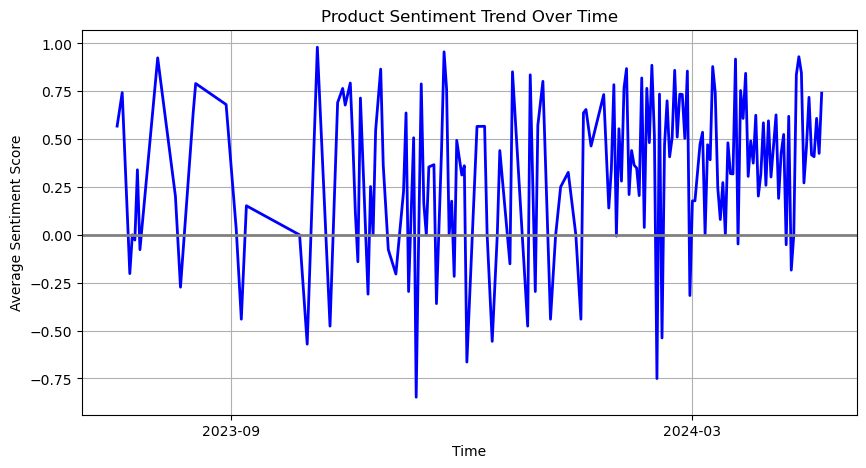

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Aggregate the sentiment scores by date.
df_aggregated = df.groupby('date')['compound_Vader'].mean().reset_index()

# Plot the trend line
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['compound_Vader'], marker='', color='blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')


# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Product Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')


plt.show()


In [353]:
df['date']

197   2021-09-13
193   2021-11-03
192   2021-11-05
191   2021-11-06
185   2022-03-26
         ...    
301   2024-04-15
200   2024-04-15
2     2024-04-16
401   2024-04-17
0     2024-04-17
Name: date, Length: 146, dtype: datetime64[ns]

# Features, vader on feature

In [27]:
features = ['taste','value', 'leakage', 'appearance', 'flavor', 'quality', 'sugar content', 'carbs', 'calories','appearance', 'caffeine content','calories', 'motivation','price','package','packaging','brand']
def feature_presence(combined, features):
    # Initialize an empty list to store the features present in the message
    present_features = []
    # Check each feature for its presence in the message
    for feature in features:
        if feature in combined:  
            present_features.append(feature)
    # Return the list of present features
    return ', '.join(present_features)

df['features'] = df['combined'].apply(feature_presence, features=features)

# Filter out rows where no features are detected
df = df[df['features'] != '']

df

,Unnamed: 0,product,date,rating,reviews,title,combined,sentiment,vader_scores,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader,Vader_Sentiment,positive_compound,negative_compound,month_year,features
198,198,"Amazon.com: Customer reviews: Monster Energy, ...",2023-07-18,5.0,love flavor definitely give energy,,love flavor definitely give energy,1,"{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'comp...",0.000,0.182,0.818,0.8402,1,0.8402,NaN,July 2023,flavor
197,197,"Amazon.com: Customer reviews: Monster Energy, ...",2023-07-20,3.0,subscribe save item getting hard consistently ...,,subscribe save item getting hard consistently...,0,"{'neg': 0.106, 'neu': 0.623, 'pos': 0.271, 'co...",0.106,0.623,0.271,0.7430,1,0.7430,NaN,July 2023,"taste, brand"
196,196,"Amazon.com: Customer reviews: Monster Energy, ...",2023-07-23,1.0,package thrown beside porch can dented empty,,package thrown beside porch can dented empty,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.231,0.769,0.000,-0.2023,0,NaN,-0.2023,July 2023,package
194,194,"Amazon.com: Customer reviews: Monster Energy, ...",2023-07-25,5.0,best place purchase drink since price soared s...,,best place purchase drink since price soared ...,1,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.000,0.625,0.375,0.6369,1,0.6369,NaN,July 2023,price
190,190,"Amazon.com: Customer reviews: Monster Energy, ...",2023-08-03,5.0,enjoyed monster energy lo carb well year hope ...,,enjoyed monster energy lo carb well year hope...,1,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.000,0.417,0.583,0.9246,1,0.9246,NaN,August 2023,"taste, brand"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2,Amazon.com: Customer reviews: Monster Energy Z...,2024-04-20,5.0,using stevia year use everything absolutely be...,,using stevia year use everything absolutely b...,1,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",0.000,0.523,0.477,0.9646,1,0.9646,NaN,April 2024,"taste, price, package"
302,302,Amazon.com: Customer reviews: Monster Energy U...,2024-04-20,5.0,using stevia year use everything absolutely be...,quick delivery great taste mix well,quick delivery great taste mix well using stev...,1,"{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'comp...",0.000,0.496,0.504,0.9785,1,0.9785,NaN,April 2024,"taste, price, package"
400,400,Amazon.com: Customer reviews: Monster Energy J...,2024-04-20,4.0,taste good great subscription option package r...,can dinged bottom,can dinged bottom taste good great subscriptio...,1,"{'neg': 0.108, 'neu': 0.632, 'pos': 0.26, 'com...",0.108,0.632,0.260,0.6249,1,0.6249,NaN,April 2024,"taste, leakage, package"
300,300,Amazon.com: Customer reviews: Monster Energy U...,2024-04-21,5.0,great taste,good value,good value great taste,1,"{'neg': 0.0, 'neu': 0.096, 'pos': 0.904, 'comp...",0.000,0.096,0.904,0.8555,1,0.8555,NaN,April 2024,"taste, value"


In [28]:
df['features'].value_counts()

features
flavor                          71
taste                           57
taste, flavor                   28
price                           24
package                         17
flavor, price                   13
packaging                       10
taste, price                     8
quality                          8
value                            4
value, flavor                    3
flavor, package                  3
taste, flavor, price             3
taste, price, package            2
taste, flavor, brand             2
taste, brand                     2
value, quality                   2
taste, value                     2
taste, carbs                     2
price, package                   2
taste, quality                   1
value, flavor, price             1
taste, value, price, package     1
value, price                     1
taste, package                   1
package, packaging               1
brand                            1
quality, package                 1
taste, flav

In [29]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Filter rows that mention 'taste' or 'flavor'
mask_taste = df['features'].str.contains('taste', na=False, case=False)
mask_flavor = df['features'].str.contains('flavor', na=False, case=False)
mask_price = df['features'].str.contains('price', na=False, case=False)
mask_package = df['features'].str.contains('package', na=False, case=False)
mask_value = df['features'].str.contains('value', na=False, case=False)
mask_packaging = df['features'].str.contains('packaging', na=False, case=False)

# Filter DataFrame based on the masks
df_taste = df[mask_taste]
df_flavor = df[mask_flavor]
df_price = df[mask_price]
df_package = df[mask_package]
df_value = df[mask_value]
df_packaging = df[mask_packaging]

# Define a function to apply VADER sentiment analysis and return the compound score
def get_vader_sentiment(text):
    return sid.polarity_scores(text)['compound']

# Apply the VADER sentiment analysis function to the review text for 'taste' and 'flavor'
df_taste['sentiment_taste'] = df_taste['combined'].apply(get_vader_sentiment)
df_flavor['sentiment_flavor'] = df_flavor['combined'].apply(get_vader_sentiment)
df_taste['sentiment_price'] = df_taste['combined'].apply(get_vader_sentiment)
df_flavor['sentiment_package'] = df_flavor['combined'].apply(get_vader_sentiment)
df_taste['sentiment_value'] = df_taste['combined'].apply(get_vader_sentiment)
df_taste['sentiment_packaging'] = df_taste['combined'].apply(get_vader_sentiment)

# Apply VADER sentiment analysis and store results in the original DataFrame
df.loc[mask_taste, 'sentiment_taste'] = df.loc[mask_taste, 'combined'].apply(get_vader_sentiment)
df.loc[mask_flavor, 'sentiment_flavor'] = df.loc[mask_flavor, 'combined'].apply(get_vader_sentiment)
df.loc[mask_price, 'sentiment_price'] = df.loc[mask_price, 'combined'].apply(get_vader_sentiment)
df.loc[mask_package, 'sentiment_package'] = df.loc[mask_package, 'combined'].apply(get_vader_sentiment)
df.loc[mask_value, 'sentiment_value'] = df.loc[mask_value, 'combined'].apply(get_vader_sentiment)
df.loc[mask_value, 'sentiment_packaging'] = df.loc[mask_value, 'combined'].apply(get_vader_sentiment)




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\tuhon\AppData\Local\Temp\ipykernel_36712\1324811391.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taste['sentiment_taste'] = df_taste['combined'].apply(get_vader_sentiment)
C:\Users\tuhon\AppData\Local\Temp\ipykernel_36712\1324811391.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flavor['sentiment_flavor'] = df_fla

In [30]:
df

,Unnamed: 0,product,date,rating,reviews,title,combined,sentiment,vader_scores,negscore_Vader,...,positive_compound,negative_compound,month_year,features,sentiment_taste,sentiment_flavor,sentiment_price,sentiment_package,sentiment_value,sentiment_packaging
198,198,"Amazon.com: Customer reviews: Monster Energy, ...",2023-07-18,5.0,love flavor definitely give energy,,love flavor definitely give energy,1,"{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'comp...",0.000,...,0.8402,NaN,July 2023,flavor,NaN,0.8402,NaN,NaN,NaN,NaN
197,197,"Amazon.com: Customer reviews: Monster Energy, ...",2023-07-20,3.0,subscribe save item getting hard consistently ...,,subscribe save item getting hard consistently...,0,"{'neg': 0.106, 'neu': 0.623, 'pos': 0.271, 'co...",0.106,...,0.7430,NaN,July 2023,"taste, brand",0.7430,NaN,NaN,NaN,NaN,NaN
196,196,"Amazon.com: Customer reviews: Monster Energy, ...",2023-07-23,1.0,package thrown beside porch can dented empty,,package thrown beside porch can dented empty,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.231,...,NaN,-0.2023,July 2023,package,NaN,NaN,NaN,-0.2023,NaN,NaN
194,194,"Amazon.com: Customer reviews: Monster Energy, ...",2023-07-25,5.0,best place purchase drink since price soared s...,,best place purchase drink since price soared ...,1,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.000,...,0.6369,NaN,July 2023,price,NaN,NaN,0.6369,NaN,NaN,NaN
190,190,"Amazon.com: Customer reviews: Monster Energy, ...",2023-08-03,5.0,enjoyed monster energy lo carb well year hope ...,,enjoyed monster energy lo carb well year hope...,1,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.000,...,0.9246,NaN,August 2023,"taste, brand",0.9246,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2,Amazon.com: Customer reviews: Monster Energy Z...,2024-04-20,5.0,using stevia year use everything absolutely be...,,using stevia year use everything absolutely b...,1,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",0.000,...,0.9646,NaN,April 2024,"taste, price, package",0.9646,NaN,0.9646,0.9646,NaN,NaN
302,302,Amazon.com: Customer reviews: Monster Energy U...,2024-04-20,5.0,using stevia year use everything absolutely be...,quick delivery great taste mix well,quick delivery great taste mix well using stev...,1,"{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'comp...",0.000,...,0.9785,NaN,April 2024,"taste, price, package",0.9778,NaN,0.9778,0.9778,NaN,NaN
400,400,Amazon.com: Customer reviews: Monster Energy J...,2024-04-20,4.0,taste good great subscription option package r...,can dinged bottom,can dinged bottom taste good great subscriptio...,1,"{'neg': 0.108, 'neu': 0.632, 'pos': 0.26, 'com...",0.108,...,0.6249,NaN,April 2024,"taste, leakage, package",0.6249,NaN,NaN,0.6249,NaN,NaN
300,300,Amazon.com: Customer reviews: Monster Energy U...,2024-04-21,5.0,great taste,good value,good value great taste,1,"{'neg': 0.0, 'neu': 0.096, 'pos': 0.904, 'comp...",0.000,...,0.8555,NaN,April 2024,"taste, value",0.8555,NaN,NaN,NaN,0.8555,0.8555


In [31]:
df[['product', 'date', 'rating', 'title', 'reviews', 'combined', 'sentiment', 'sentiment_taste', 'sentiment_flavor','sentiment_price','sentiment_package','sentiment_value','sentiment_packaging']].to_csv('feature monster.csv')


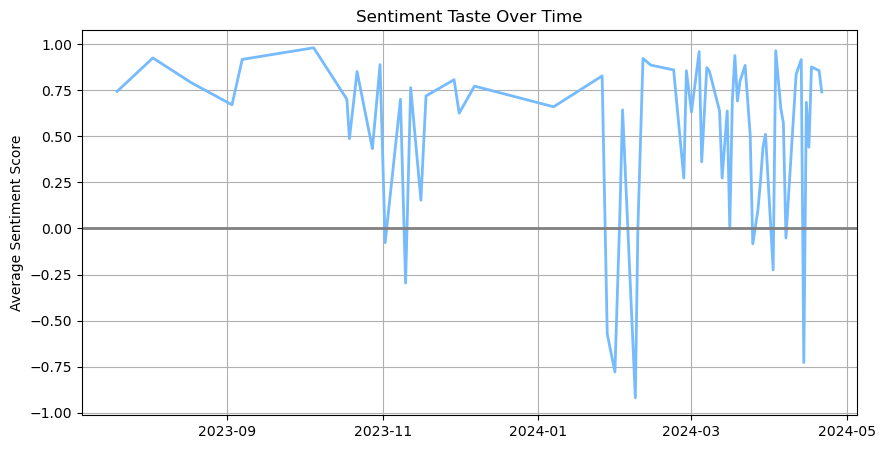

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_taste'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_taste'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_taste'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment Taste Over Time')
plt.ylabel('Average Sentiment Score')


plt.show()


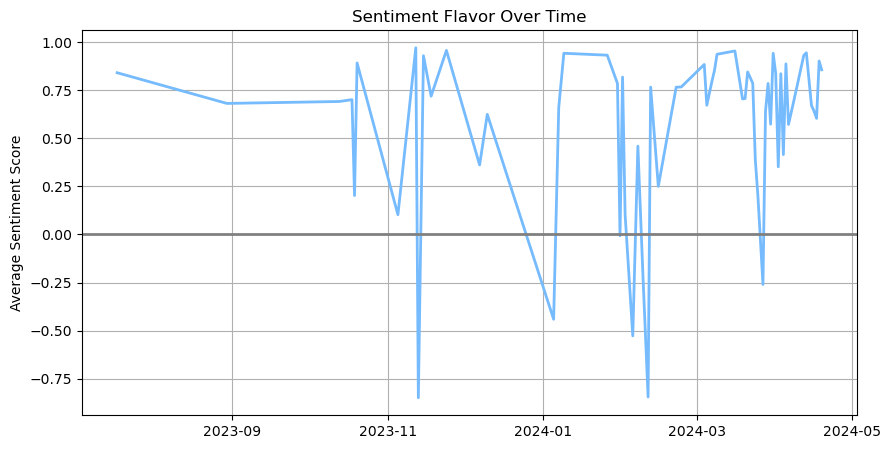

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_flavor'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_flavor'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_flavor'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment Flavor Over Time')
plt.ylabel('Average Sentiment Score')

plt.show()


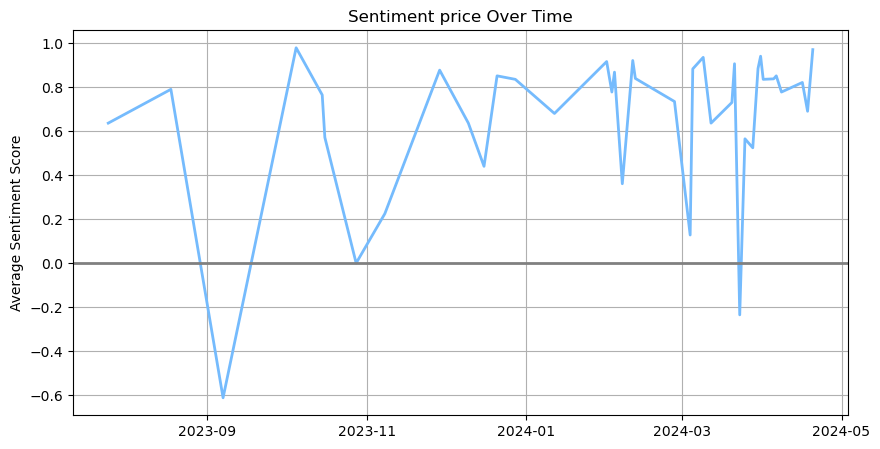

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_price'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_price'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_price'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2)) 

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment price Over Time')
plt.ylabel('Average Sentiment Score')

plt.show()


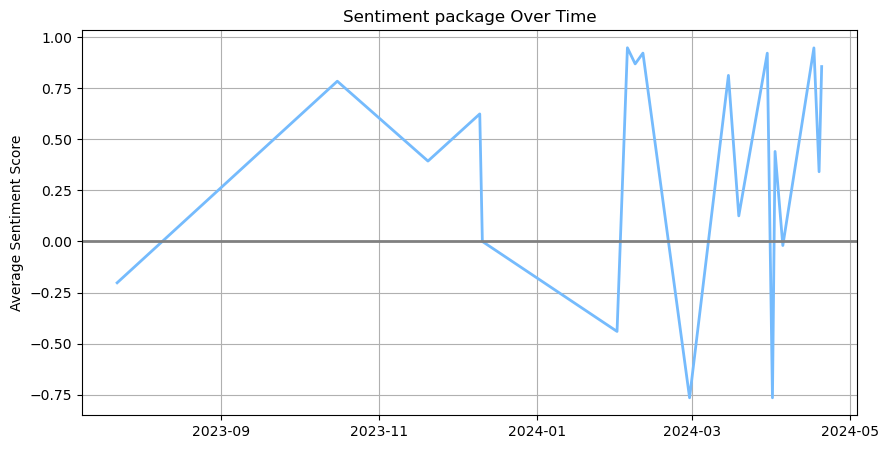

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_package'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_package'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_package'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment package Over Time')
plt.ylabel('Average Sentiment Score')

plt.show()


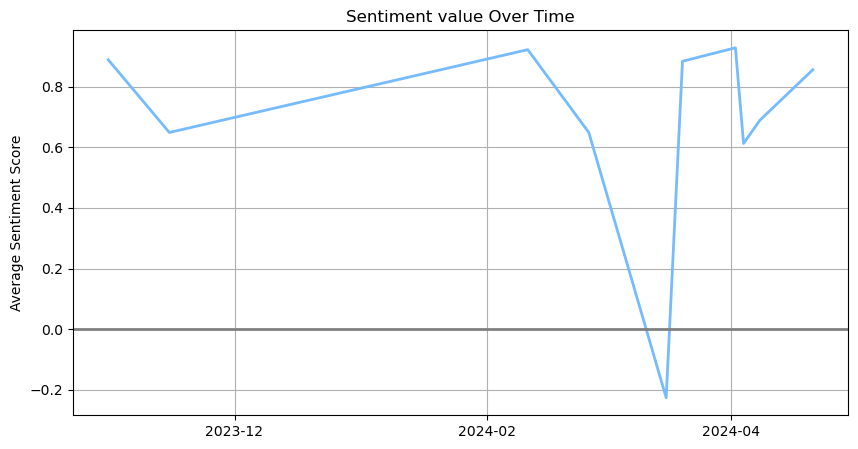

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_value'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_value'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_value'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment value Over Time')
plt.ylabel('Average Sentiment Score')

plt.show()


In [347]:
features = ['taste','value', 'leakage', 'appearance', 'flavor', 'quality', 'sugar content', 'carbs', 'calories','appearance', 'caffeine content','calories', 'motivation']
columns_to_average = ['negscore_Vader', 'neuscore_Vader', 'posscore_Vader', 'compound_Vader']

# Initialize a new DataFrame to store the average sentiment for each feature
df_feature_avgs = pd.DataFrame(index=features, columns=columns_to_average)

# For each feature, filter messages containing that feature and calculate average sentiment scores
for feature in features:
    messages_with_feature = df[df['combined'].str.contains(feature, case=False, na=False)]
    for column in columns_to_average:
        df_feature_avgs.at[feature, column] = messages_with_feature[column].mean()

df_feature_avgs.reset_index(inplace=True)
df_feature_avgs.rename(columns={'index': 'Feature'}, inplace=True)

df_feature_avgs

,Feature,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader
0,taste,0.045989,0.638389,0.315611,0.627002
1,value,0.012833,0.482917,0.504167,0.802217
2,leakage,0.09,0.729,0.181,0.8453
3,appearance,NaN,NaN,NaN,NaN
4,flavor,0.0376,0.633462,0.328892,0.686723
5,quality,0.2036,0.6386,0.1576,0.07212
6,sugar content,NaN,NaN,NaN,NaN
7,carbs,NaN,NaN,NaN,NaN
8,calories,0.035,0.819,0.146,0.46025
9,appearance,NaN,NaN,NaN,NaN


In [348]:
import re
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

# Get synonyms for the features
def get_synonyms(word):
    synonyms = set()
    for synset in wn.synsets(word):
        for lemma in synset.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return synonyms

# Create a dictionary to store each feature and its synonyms
feature_synonyms = {feature: get_synonyms(feature) for feature in features}

# Update the filtering function to also filter out features and their synonyms
def filter_messages_by_feature_synonyms(df, feature_synonyms):
    # Initialize an empty DataFrame for each feature
    df_feature_avgs = pd.DataFrame(index=feature_synonyms.keys(), columns=columns_to_average)
    
    # For each feature and its synonyms, filter messages and calculate the average sentiment scores
    for feature, synonyms in feature_synonyms.items():
        # Create a regular expression to match the feature or any of its synonyms
        regex_pattern = '|'.join(map(re.escape, synonyms))
        sentences_with_feature = df[df['combined'].str.contains(regex_pattern, case=False, na=False)]
        for column in columns_to_average:
            df_feature_avgs.at[feature, column] = sentences_with_feature[column].mean()
    
    df_feature_avgs.reset_index(inplace=True)
    df_feature_avgs.rename(columns={'index': 'Feature'}, inplace=True)
    return df_feature_avgs

# Apply the filtering function
df_feature_avgs = filter_messages_by_feature_synonyms(df, feature_synonyms)
df_feature_avgs

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Feature,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader
0,taste,0.04651,0.639073,0.314406,0.630646
1,value,0.032,0.543063,0.424813,0.77215
2,leakage,0.095,0.57,0.335,0.8522
3,appearance,NaN,NaN,NaN,NaN
4,flavor,0.038662,0.638838,0.322441,0.6803
5,quality,0.119364,0.690273,0.190182,0.3803
6,sugar content,0.043452,0.623027,0.3335,0.638023
7,carbs,0.043452,0.623027,0.3335,0.638023
8,calories,0.029667,0.79,0.180333,0.628233
9,caffeine content,0.043452,0.623027,0.3335,0.638023


In [349]:
feature_synonyms

{'taste': {'appreciation',
  'discernment',
  'gustation',
  'gustatory modality',
  'gustatory perception',
  'gustatory sensation',
  'mouthful',
  'penchant',
  'perceptiveness',
  'predilection',
  'preference',
  'sample',
  'savor',
  'savour',
  'sense of taste',
  'smack',
  'taste',
  'taste perception',
  'taste sensation',
  'tasting',
  'try',
  'try out'},
 'value': {'appraise',
  'appreciate',
  'assess',
  'economic value',
  'esteem',
  'evaluate',
  'measure',
  'note value',
  'prise',
  'prize',
  'rate',
  'respect',
  'time value',
  'treasure',
  'valuate',
  'value'},
 'leakage': {'escape', 'leak', 'leakage', 'outflow'},
 'appearance': {'appearance',
  'appearing',
  'coming into court',
  'show',
  'visual aspect'},
 'flavor': {'feel',
  'feeling',
  'flavor',
  'flavour',
  'look',
  'nip',
  'relish',
  'sapidity',
  'savor',
  'savour',
  'season',
  'smack',
  'smell',
  'spirit',
  'tang',
  'tone'},
 'quality': {'caliber',
  'calibre',
  'character',
  'ch